In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv("/content/data.csv")
print("shape:", df.shape)
print(df.head())


shape: (569, 33)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_

In [3]:
# drop id col
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

# encode target
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})

# check missing
print("\nmissing values:\n", df.isnull().sum())


missing values:
 diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32          

In [4]:
# split x y
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# impute missing
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# predict
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:,1]


report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

roc-auc: 0.9953703703703703


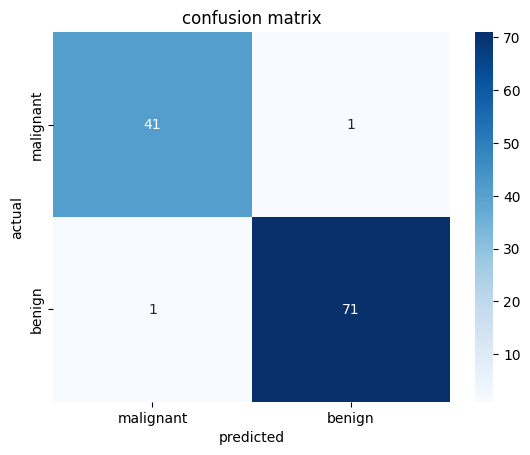

In [6]:
# metrics
print("\nreport:\n", classification_report(y_test, y_pred))
print("roc-auc:", roc_auc_score(y_test, y_pred_proba))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['malignant','benign'],
            yticklabels=['malignant','benign'])
plt.ylabel('actual')
plt.xlabel('predicted')
plt.title('confusion matrix')
plt.show()

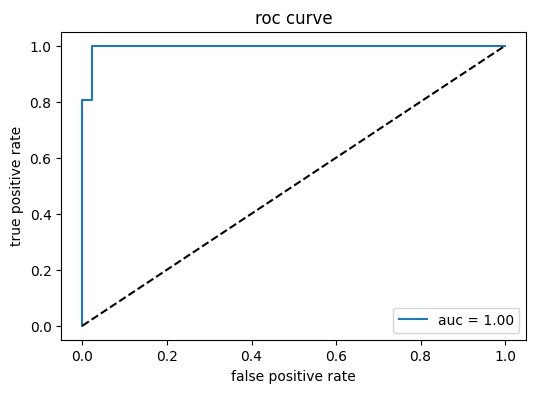

In [7]:
# roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='auc = {:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("roc curve")
plt.legend()
plt.show()


custom threshold cm:
 [[41  1]
 [ 1 71]]


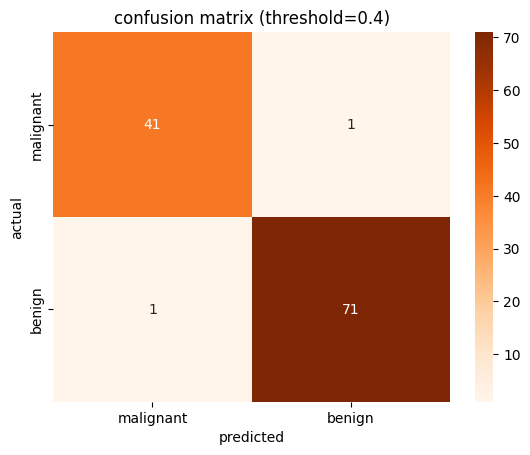

In [8]:
# threshold tuning
threshold = 0.4
y_pred_custom = (y_pred_proba >= threshold).astype(int)
cm_custom = confusion_matrix(y_test, y_pred_custom)
print("\ncustom threshold cm:\n", cm_custom)
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['malignant','benign'],
            yticklabels=['malignant','benign'])
plt.ylabel('actual')
plt.xlabel('predicted')
plt.title('confusion matrix (threshold=0.4)')
plt.show()


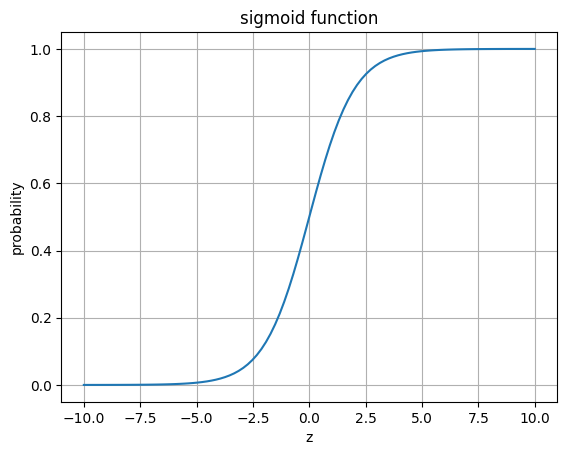

In [9]:
# sigmoid plot
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))
plt.plot(z, sigmoid)
plt.title("sigmoid function")
plt.xlabel("z")
plt.ylabel("probability")
plt.grid()
plt.show()